In [1]:
# !pip install xgboost

In [2]:
# model 套件
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PowerTransformer
import math
import warnings
warnings.filterwarnings('ignore')


# Second Preprocessing

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [4]:
# 處理 data 套件
import numpy as np
import pandas as pd

In [5]:
# let column can show all
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df = pd.read_csv('BayesianRidge_Pre/Input_A2_024.csv')
# df1 = pd.read_csv('Input_C_057.csv')
# df2 = pd.read_csv('Input_C_050.csv')

In [7]:
title = ['Input_A2_022']

# title = ['Input_A2_023','Input_A3_024','Input_A3_022','Input_A3_023','Input_A4_024','Input_A4_022','Input_A4_023']

In [8]:
X = df[title]
scaler = RobustScaler()
df[title] = scaler.fit_transform(X)
y = df['Predict']

In [ ]:
# 直接執行轉換拉到最下面會發現 Wraninig
for col in title: # Predict 不做轉換
    if abs(df[col].skew()) >= 0.7: # 取偏態絕對值大於 0.5的項
        print(col)
        pt = PowerTransformer() # PowerTransformer 預設為 Yeo-Johson 轉換可轉正負數，不同於另一種 Box-Cox 只能用於正數
        d = pt.fit_transform(df[col].values.reshape(-1, 1)).flatten()
        df[col]=d

In [10]:
def pMSE(ans,predict):
    pmse = math.sqrt(sum(pow((ans - predict)/ans*100,2)/len(ans)))
    return pmse

In [11]:
def pNumber(ans,predict,num):
    return sum(abs((ans-predict)/ans*100) < num)

# Split data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LassoCV

In [13]:
lasso = LassoCV(alphas=[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30],random_state = 42)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("first best alpha:", alpha)
lasso = LassoCV(alphas=[0.00004, 0.00008, 0.0001, 0.0003, 0.0006],random_state = 42)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("second best alpha:", alpha)
lasso = LassoCV(alphas=[0.0001 + i/100000 for i in range(1, 20)], random_state = 42)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("final best alpha:", alpha)

first best alpha: 1e-05
second best alpha: 4e-05
final best alpha: 0.00011


In [14]:
y_pred = lasso.predict(X_test)

In [15]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, y_pred))

R2 score: 0.6173


In [16]:
print("Percentage mse score: %.2f"
      % pMSE(y_test,y_pred))

Percentage mse score: inf


In [17]:
print("Number lower than error: %d"
      % pNumber(y_test, y_pred, 15))

Number lower than error: 0


In [18]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 0.008832


In [19]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - pow(y_pred,2))/y_test*100).describe(percentiles = p)

count    105.000000
mean            inf
std             NaN
min       99.366953
10%       99.366953
20%       99.366953
30%       99.450188
40%       99.450188
50%       99.450188
60%       99.450188
70%       99.450188
80%      100.000673
90%      100.053036
max             inf
Name: Predict, dtype: float64

In [20]:
lasso.coef_

array([0.38371569])

# Linear regresssion

In [21]:
# 建立一個線性回歸模型
regr = LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(X_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(X_test)

In [22]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.6f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 0.000006


In [23]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 0.002542


In [24]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, y_pred))

R2 score: 0.9683


In [25]:
# the score function displays the accuracy of the model which translates to how well the model 
# can accurately predict for a new datapoint.
print("Linear regression score: %.4f"
      % regr.score(X_train,y_train))

Linear regression score: 0.9646


In [26]:
print("Percentage mse score: %.2f"
      % pMSE(y_test, y_pred))

Percentage mse score: inf


In [27]:
# y_test : len 103
print("Number lower than error: %d"   
      % pNumber(y_test, y_pred, 15))

Number lower than error: 98


In [28]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.94]
abs((y_test - y_pred)/y_test*100).describe(percentiles = p)

count    105.000000
mean            inf
std             NaN
min        0.271729
10%        0.271729
20%        0.463362
30%        1.469275
40%        1.469275
50%        1.469275
60%        2.049610
70%        2.049610
80%        2.049610
90%        2.049610
94%       20.115873
max             inf
Name: Predict, dtype: float64

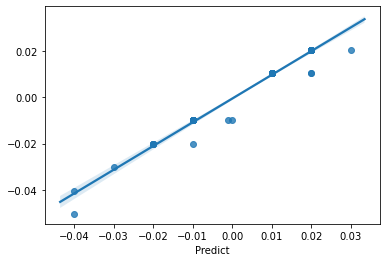

In [29]:
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline
sb.regplot(y_test, y_pred)

In [30]:
# p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.
# If p-value <= alpha (0.05) : Reject H0 => need Normally distributed
# If p-value > alpha (0.05) : Accept H0 
from statsmodels.stats.diagnostic import normal_ad
normal_ad(y_test - y_pred)

(33.21662504296478, 0.0)

# XGBoost regression

In [31]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,KFold
from scipy.stats import skew


# 先調 booster / n_estimators

In [32]:
#for tuning parameters
parameters_for_testing = {
    'booster':['gbtree','gblinear','dart'],
    'n_estimators':[50,60,70,80,90,100,120,150,200,250,260],
}

other_params = {'learning_rate': 0.1, 'n_estimators': 90, 'max_depth': 5, 'min_child_weight': 1, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 33 candidates, totalling 99 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    3.2s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    3.2s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:    3.2s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1935s.) Setting batch_size=2.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    3.3s
[Parallel(n_jobs=6)]: Done  39 tasks      | elapsed:    3.3s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0759s.) Setting batch_size=10.


best params
{'booster': 'dart', 'n_estimators': 200}
best score
0.9565838647471736


[Parallel(n_jobs=6)]: Done  99 out of  99 | elapsed:    3.8s finished


# 調 max_depth / min_child_weight

In [33]:
#for tuning parameters
parameters_for_testing = {
    'max_depth': [1,2,3, 4, 5, 6, 7, 8, 9, 10], 
    'min_child_weight': [1, 2, 3, 4, 5, 6]
}

other_params = {'booster':'dart','learning_rate': 0.1, 'n_estimators': 200, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0635s.) Setting batch_size=6.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 114 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 150 out of 180 | elapsed:    1.5s remaining:    0.2s


best params
{'max_depth': 2, 'min_child_weight': 1}
best score
0.9565864309421214


[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    1.8s finished


# 調 gamma

In [34]:
#for tuning parameters
parameters_for_testing = {
    'gamma': [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
}

other_params = {'booster':'dart','learning_rate': 0.1, 'n_estimators': 200, 'max_depth': 2, 'min_child_weight': 1, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0518s.) Setting batch_size=6.
[Parallel(n_jobs=6)]: Done   4 out of  21 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=6)]: Done   7 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=6)]: Done  10 out of  21 | elapsed:    0.0s remaining:    0.0s


best params
{'gamma': 0}
best score
0.9565864309421214


[Parallel(n_jobs=6)]: Done  21 out of  21 | elapsed:    0.2s finished


# 調 subsample / colsample_bytree

In [35]:
#for tuning parameters
parameters_for_testing = {
    'subsample': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

other_params = {'booster':'dart','learning_rate': 0.1, 'n_estimators': 200, 'max_depth': 2, 'min_child_weight': 1, 'seed': 42,
 'reg_alpha': 0, 'reg_lambda': 1, 'gamma':0}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0868s.) Setting batch_size=4.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done  44 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done  80 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed:    1.6s


best params
{'colsample_bytree': 0.2, 'subsample': 0.8}
best score
0.9565864309421214


[Parallel(n_jobs=6)]: Done 192 out of 192 | elapsed:    2.3s finished


# reg_alpha / reg_lambda

In [36]:
#for tuning parameters
parameters_for_testing = {
    'reg_alpha': [0,0.05, 0.1, 0.5 , 1, 2, 3], 'reg_lambda': [0.05, 0.1, 0.5 , 1, 2, 3]
}

other_params = {'booster':'dart','learning_rate': 0.1, 'n_estimators': 200, 'max_depth': 2, 'min_child_weight': 1, 'seed': 42,
 'gamma':0,'subsample':0.8,'colsample_bytree': 0.2}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0648s.) Setting batch_size=6.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:    0.6s


best params
{'reg_alpha': 0, 'reg_lambda': 2}
best score
0.9566291278271583


[Parallel(n_jobs=6)]: Done 102 out of 126 | elapsed:    0.9s remaining:    0.1s
[Parallel(n_jobs=6)]: Done 126 out of 126 | elapsed:    1.0s finished


# learning_rate

In [37]:
#for tuning parameters
parameters_for_testing = {
   'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2]
}

other_params = {'booster':'dart', 'n_estimators': 200, 'max_depth': 2, 'min_child_weight': 1, 'seed': 42,
 'gamma':0,'subsample':0.8,'colsample_bytree': 0.2,'reg_alpha': 0, 'reg_lambda': 2}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0628s.) Setting batch_size=6.
[Parallel(n_jobs=6)]: Done   4 out of  15 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=6)]: Done   6 out of  15 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=6)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:    0.2s finished


best params
{'learning_rate': 0.1}
best score
0.9566291278271583


In [38]:
best_xgb_model = XGBRegressor(
              learning_rate = 0.1,
              booster = 'dart', 
              n_estimators = 200, 
              max_depth = 2, 
              min_child_weight = 1,
              seed = 42,
              gamma = 0,
              subsample = 0.8,
              colsample_bytree = 0.2,
              reg_alpha =  0,
              reg_lambda = 2)

best_xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=2, scale_pos_weight=1, seed=42, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
y_pred = best_xgb_model.predict(X_test)

In [40]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, y_pred))

R2 score: 0.9699


In [41]:
print("Percentage rmse score: %.2f"
      % pMSE(y_test,y_pred))

Percentage rmse score: inf


In [42]:
print("Number lower than error: %d"
      % pNumber(y_test, y_pred, 15))

Number lower than error: 98


In [43]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test,y_pred)))

Root mean squared error: 0.002476


In [44]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - y_pred)/y_test*100).describe(percentiles = p)

count    105.000000
mean            inf
std             NaN
min        0.173652
10%        0.173652
20%        0.173652
30%        0.173652
40%        0.173652
50%        2.346134
60%        2.466834
70%        2.768391
80%        2.768391
90%        2.768391
max             inf
Name: Predict, dtype: float64

In [45]:
# the score function displays the accuracy of the model which translates to how well the model 
# can accurately predict for a new datapoint.
print("XGBoost regression score: %.4f"
      % best_xgb_model.score(X_train,y_train))

XGBoost regression score: 0.9671


In [46]:
# XGBoost
xgb = XGBRegressor(booster = 'gblinear', loss = 'reg:linear')

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

[23:46:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { loss } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [47]:
print("Percentage rmse score: %.2f"
      % pMSE(y_test,y_pred))

Percentage rmse score: inf


In [48]:
print("Number lower than error: %d"
      % pNumber(y_test, y_pred, 15))

Number lower than error: 98


In [ ]:
# X = pd.concat([df[title], con1,con2], axis=1).to_numpy() 